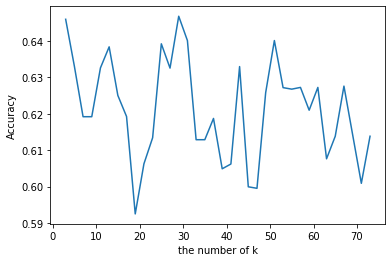

The best number of k:29


prediction  ground_truth
0             1             1
1             0             1
2             1             1
3             1             1
4             1             1
..          ...           ...
148           0             0
149           0             0
150           1             0
151           1             0
152           1             0

[153 rows x 2 columns]

In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv(r'/Users/air/Leena Python/MachineLearning/heart_train.csv')
test = pd.read_csv(r'/Users/air/Leena Python/MachineLearning/heart_test.csv')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

max_k_range = train.shape[0]//2
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)
    
cross_validation_scores = []
x_train = train[['age', 'trestbps', 'chol', 'thalach']]
y_train = train[['target']]

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10,scoring='accuracy')
    cross_validation_scores.append(scores.mean())
    
cross_validation_scores

plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("The best number of k:" + str(k))

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[['age', 'trestbps', 'chol', 'thalach']]
y_train = train[['target']]

knn.fit(x_train, y_train.values.ravel())

x_test = test[['age', 'trestbps', 'chol', 'thalach']]
y_test = test[['target']]

pred = knn.predict(x_test)

comparison = pd.DataFrame(
    {'prediction':pred, 'ground_truth':y_test.values.ravel()})
comparison

In [36]:
# Train_test_split으로 8:2로 나눠 예측해보기

In [30]:
heart_data=pd.read_csv('/Users/air/Leena Python/MachineLearning/heart.csv')

In [31]:
heart_data.info()
heart_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
5   0     1       1  
6   0     2       1  
7   0     3       1  
8   0     3       1  
9   0     2       1

In [32]:
heart_df=pd.DataFrame(data=heart_data)

In [20]:
heart_df.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
5   0     1       1  
6   0     2       1  
7   0     3       1  
8   0     3       1  
9   0     2       1

In [33]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(heart_df,test_size=0.2, random_state=11)

In [34]:
train.shape[0]
test.shape[0]

61

In [38]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

max_k_range = train.shape[0]//2
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)
    
cross_validation_scores = []
x_train = train[['age', 'trestbps', 'chol', 'thalach']]
y_train = train[['target']]

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10,scoring='accuracy')
    cross_validation_scores.append(scores.mean())
    
cross_validation_scores



[0.6354202898550725,
 0.6698115942028985,
 0.6573115942028986,
 0.6482826086956521,
 0.6566159420289854,
 0.6486159420289855,
 0.6441014492753623,
 0.6609637681159419,
 0.6441014492753623,
 0.6649637681159419,
 0.6651304347826087,
 0.6771304347826087,
 0.6687971014492754,
 0.6479347826086956,
 0.6395869565217391,
 0.6520869565217391,
 0.6517536231884057,
 0.6352536231884057,
 0.6519347826086956,
 0.6401014492753623,
 0.6601159420289855,
 0.647586956521739,
 0.6479202898550723,
 0.6519202898550723,
 0.6437536231884058,
 0.6352246376811594,
 0.6564202898550724,
 0.660586956521739,
 0.656586956521739,
 0.6526014492753622,
 0.6531159420289855,
 0.6531159420289855,
 0.6446014492753623,
 0.6569492753623188,
 0.644768115942029,
 0.6404202898550724,
 0.6362391304347825,
 0.6525869565217391,
 0.6482391304347827,
 0.6531014492753624,
 0.6402246376811594,
 0.6447536231884058,
 0.6364057971014494,
 0.6324057971014494,
 0.631891304347826,
 0.6237246376811594,
 0.6237246376811594,
 0.619210144927536

In [40]:
for i in range(len(k_list)):
    print('k: {0}, 정확도 : {1}'.format(k_list[i], cross_validation_scores[i]))

k: 3, 정확도 : 0.6354202898550725
k: 5, 정확도 : 0.6698115942028985
k: 7, 정확도 : 0.6573115942028986
k: 9, 정확도 : 0.6482826086956521
k: 11, 정확도 : 0.6566159420289854
k: 13, 정확도 : 0.6486159420289855
k: 15, 정확도 : 0.6441014492753623
k: 17, 정확도 : 0.6609637681159419
k: 19, 정확도 : 0.6441014492753623
k: 21, 정확도 : 0.6649637681159419
k: 23, 정확도 : 0.6651304347826087
k: 25, 정확도 : 0.6771304347826087
k: 27, 정확도 : 0.6687971014492754
k: 29, 정확도 : 0.6479347826086956
k: 31, 정확도 : 0.6395869565217391
k: 33, 정확도 : 0.6520869565217391
k: 35, 정확도 : 0.6517536231884057
k: 37, 정확도 : 0.6352536231884057
k: 39, 정확도 : 0.6519347826086956
k: 41, 정확도 : 0.6401014492753623
k: 43, 정확도 : 0.6601159420289855
k: 45, 정확도 : 0.647586956521739
k: 47, 정확도 : 0.6479202898550723
k: 49, 정확도 : 0.6519202898550723
k: 51, 정확도 : 0.6437536231884058
k: 53, 정확도 : 0.6352246376811594
k: 55, 정확도 : 0.6564202898550724
k: 57, 정확도 : 0.660586956521739
k: 59, 정확도 : 0.656586956521739
k: 61, 정확도 : 0.6526014492753622
k: 63, 정확도 : 0.6531159420289855
k: 65, 정확도 : 0.

In [ ]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("The best number of k:" + str(k))

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[['age', 'trestbps', 'chol', 'thalach']]
y_train = train[['target']]

knn.fit(x_train, y_train.values.ravel())

x_test = test[['age', 'trestbps', 'chol', 'thalach']]
y_test = test[['target']]

pred = knn.predict(x_test)

comparison = pd.DataFrame(
    {'prediction':pred, 'ground_truth':y_test.values.ravel()})
comparison

In [37]:
cross_validation_scores

[0.6354202898550725,
 0.6698115942028985,
 0.6573115942028986,
 0.6482826086956521,
 0.6566159420289854,
 0.6486159420289855,
 0.6441014492753623,
 0.6609637681159419,
 0.6441014492753623,
 0.6649637681159419,
 0.6651304347826087,
 0.6771304347826087,
 0.6687971014492754,
 0.6479347826086956,
 0.6395869565217391,
 0.6520869565217391,
 0.6517536231884057,
 0.6352536231884057,
 0.6519347826086956,
 0.6401014492753623,
 0.6601159420289855,
 0.647586956521739,
 0.6479202898550723,
 0.6519202898550723,
 0.6437536231884058,
 0.6352246376811594,
 0.6564202898550724,
 0.660586956521739,
 0.656586956521739,
 0.6526014492753622,
 0.6531159420289855,
 0.6531159420289855,
 0.6446014492753623,
 0.6569492753623188,
 0.644768115942029,
 0.6404202898550724,
 0.6362391304347825,
 0.6525869565217391,
 0.6482391304347827,
 0.6531014492753624,
 0.6402246376811594,
 0.6447536231884058,
 0.6364057971014494,
 0.6324057971014494,
 0.631891304347826,
 0.6237246376811594,
 0.6237246376811594,
 0.619210144927536